# Analyse graphique de la dynamique epidemique du COVID-19 en France

> Visualisation de l'accéleration et du ralitessement de l'épidémie avec le temps.

- toc: true
- branch: master
- hide: false
- search_exclude: false
- badges: true
- comments: false
- author: Alexandre Payot
- categories: [Visualisation, Data, Covid]

Vous retrouverez le code utilisé à l'addresse suivante: 
[payoto/covid19-viz](https://github.com/payoto/covid19-viz)

In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#collapse-hide
import pandas as pd
from matplotlib import pyplot as plt
import requests

In [3]:
from viz import *

## Données de DataAgainst Covid-19

Données en provenance de DataAgainst COVID-19 (aka opencovid19-fr) [github.com/opencovid19-fr/data]

In [4]:
#collapse-hide
file_name = 'opencovid19-fr-chiffres-cles.csv'
url = 'https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'
myfile = requests.get(url)
open(file_name, 'wb').write(myfile.content)
data = pd.read_csv('opencovid19-fr-chiffres-cles.csv')

3595172

In [6]:
#hide
data.columns

Index(['date', 'granularite', 'maille_code', 'maille_nom', 'cas_confirmes',
       'cas_ehpad', 'cas_confirmes_ehpad', 'cas_possibles_ehpad', 'deces',
       'deces_ehpad', 'reanimation', 'hospitalises',
       'nouvelles_hospitalisations', 'nouvelles_reanimations', 'gueris',
       'depistes', 'source_nom', 'source_url', 'source_archive',
       'source_type'],
      dtype='object')

In [7]:
data.tail()

date granularite maille_code                  maille_nom  \
25093  2020-09-12      region      REG-75          Nouvelle-Aquitaine   
25094  2020-09-12      region      REG-76                   Occitanie   
25095  2020-09-12      region      REG-84        Auvergne-Rhône-Alpes   
25096  2020-09-12      region      REG-93  Provence-Alpes-Côte d'Azur   
25097  2020-09-12      region      REG-94                       Corse   

       cas_confirmes  cas_ehpad  cas_confirmes_ehpad  cas_possibles_ehpad  \
25093            NaN        NaN                  NaN                  NaN   
25094            NaN        NaN                  NaN                  NaN   
25095            NaN        NaN                  NaN                  NaN   
25096            NaN        NaN                  NaN                  NaN   
25097            NaN        NaN                  NaN                  NaN   

        deces  deces_ehpad  reanimation  hospitalises  \
25093   444.0          NaN         40.0         165.0   
25094   544.0          NaN         44.0         222.0   
25095  1803.0          NaN         70.0         522.0   
25096  1043.0          NaN        124.0         580.0   
25097    59.0          NaN          3.0          14.0   

       nouvelles_hospitalisations  nouvelles_reanimations  gueris  depistes  \
25093                        13.0                     2.0  2452.0       NaN   
25094                        16.0                     2.0  3310.0       NaN   
25095                        38.0                     4.0  8646.0       NaN   
25096                        52.0                    13.0  6969.0       NaN   
25097                         0.0                     0.0   273.0       NaN   

           source_nom source_url source_archive     source_type  
25093  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25094  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25095  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25096  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25097  OpenCOVID19-fr        NaN            NaN  opencovid19-fr

In [8]:
#hide
for a in data[["maille_code", "maille_nom"]].groupby(["maille_code", "maille_nom"]):
    print(f"{a[0]}")

('COM-974', 'La Réunion')
('COM-977', 'Saint-Barthélemy')
('COM-978', 'Saint-Martin')
('COM-986', 'Wallis et Futuna')
('COM-987', 'Polynésie française')
('COM-988', 'Nouvelle-Calédonie')
('DEP-01', 'Ain')
('DEP-02', 'Aisne')
('DEP-03', 'Allier')
('DEP-04', 'Alpes-de-Haute-Provence')
('DEP-05', 'Hautes-Alpes')
('DEP-06', 'Alpes-Maritimes')
('DEP-07', 'Ardèche')
('DEP-08', 'Ardennes')
('DEP-09', 'Ariège')
('DEP-10', 'Aube')
('DEP-11', 'Aude')
('DEP-12', 'Aveyron')
('DEP-13', 'Bouches-du-Rhône')
('DEP-14', 'Calvados')
('DEP-15', 'Cantal')
('DEP-16', 'Charente')
('DEP-17', 'Charente-Maritime')
('DEP-18', 'Cher')
('DEP-19', 'Corrèze')
('DEP-21', "Côte-d'Or")
('DEP-22', "Côtes-d'Armor")
('DEP-23', 'Creuse')
('DEP-24', 'Dordogne')
('DEP-25', 'Doubs')
('DEP-26', 'Drôme')
('DEP-27', 'Eure')
('DEP-28', 'Eure-et-Loir')
('DEP-29', 'Finistère')
('DEP-2A', 'Corse-du-Sud')
('DEP-2B', 'Haute-Corse')
('DEP-30', 'Gard')
('DEP-31', 'Haute-Garonne')
('DEP-32', 'Gers')
('DEP-33', 'Gironde')
('DEP-34', 'Hér

In [9]:
data = enable_time_series_plot(data, timein_field="date", timeseries_field_out="t")

## Dernieres donnees pour la France

deces  deces_ehpad  reanimation  hospitalises  \
t                                                             
2020-09-02  20172.0      10475.0        446.0        4632.0   
2020-09-03  20192.0      10475.0        464.0        4643.0   
2020-09-04  20210.0      10475.0        473.0        4671.0   
2020-09-05  20222.0      10475.0        482.0        4839.0   
2020-09-06  20225.0      10475.0        486.0        4905.0   
2020-09-07  20250.0      10475.0        537.0        4907.0   
2020-09-08  20289.0      10475.0        574.0        4960.0   
2020-09-09  20319.0      10475.0        599.0        5003.0   
2020-09-10  20338.0      10475.0        615.0        5096.0   
2020-09-11  20378.0      10515.0        635.0        5155.0   

            reanimation_cumul  hospitalises_cumul  deces_jour  \
t                                                               
2020-09-02           347411.0           2370637.0        25.0   
2020-09-03           347875.0           2375280.0        20.0   
2020-09-04           348348.0           2379951.0        18.0   
2020-09-05           348830.0           2384790.0        12.0   
2020-09-06           349316.0           2389695.0         3.0   
2020-09-07           349853.0           2394602.0        25.0   
2020-09-08           350427.0           2399562.0        39.0   
2020-09-09           351026.0           2404565.0        30.0   
2020-09-10           351641.0           2409661.0        19.0   
2020-09-11           352276.0           2414816.0        40.0   

            deces_jour_jour  deces_ehpad_jour  deces_ehpad_jour_jour  ...  \
t                                                                     ...   
2020-09-02              6.0               0.0                    0.0  ...   
2020-09-03             -5.0               0.0                    0.0  ...   
2020-09-04             -2.0               0.0                    0.0  ...   
2020-09-05             -6.0               0.0                    0.0  ...   
2020-09-06             -9.0               0.0                    0.0  ...   
2020-09-07             22.0               0.0                    0.0  ...   
2020-09-08             14.0               0.0                    0.0  ...   
2020-09-09             -9.0               0.0                    0.0  ...   
2020-09-10            -11.0               0.0                    0.0  ...   
2020-09-11             21.0              40.0                   40.0  ...   

            deces_jour_mma_jour  deces_ehpad_jour_mma_jour  deces_jour_prop  \
t                                                                             
2020-09-02             3.571429                   0.000000         0.000949   
2020-09-03            -1.714286                   0.000000         0.000863   
2020-09-04            -0.142857                   0.000000         0.000855   
2020-09-05             0.857143                   0.000000         0.000897   
2020-09-06            -0.142857                   0.000000         0.000890   
2020-09-07            -0.571429                   0.000000         0.000861   
2020-09-08             2.857143                   0.000000         0.001000   
2020-09-09             0.714286                   0.000000         0.001034   
2020-09-10            -0.142857                   0.000000         0.001026   
2020-09-11             3.142857                   5.714286         0.001178   

            deces_ehpad_jour_prop  reanimation_jour_prop  \
t                                                          
2020-09-02               0.000000               0.011531   
2020-09-03               0.000000               0.025554   
2020-09-04               0.000000               0.025974   
2020-09-05               0.000000               0.024303   
2020-09-06               0.000000               0.024691   
2020-09-07               0.000000               0.034052   
2020-09-08               0.000000               0.037332   
2020-09-09               0.000000               0.036489   
20

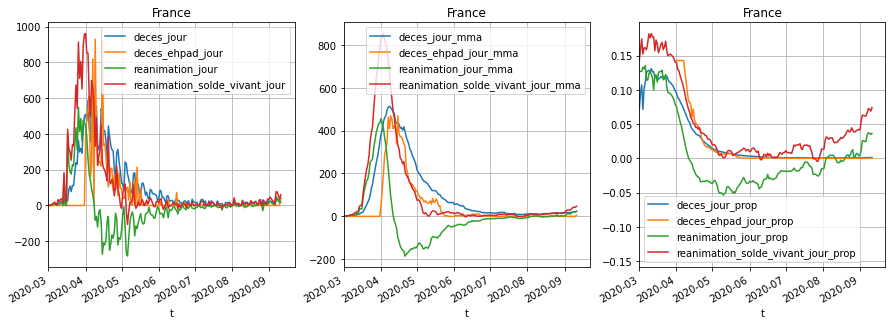

In [10]:
maille_active = 'FRA'
fra = oc19_data_preproc(data, maille_active)
fra.tail(10)

## Dynamique de l'épidemie

In [11]:
def plots_maille_code(maille_active='FRA'):
    fra = oc19_data_preproc(data, maille_active)
    plt.close()
    # plot_field_loops(fra, "deces_ehpad", center=False, maille_active=maille_active)
    plot_field_loops(fra, "hospitalises_cumul", [7], center=True, maille_active=maille_active)
    plot_field_loops(fra, "reanimation_cumul", [7], center=True, maille_active=maille_active)
    plot_field_loops(fra, "deces", center=False, maille_active=maille_active)


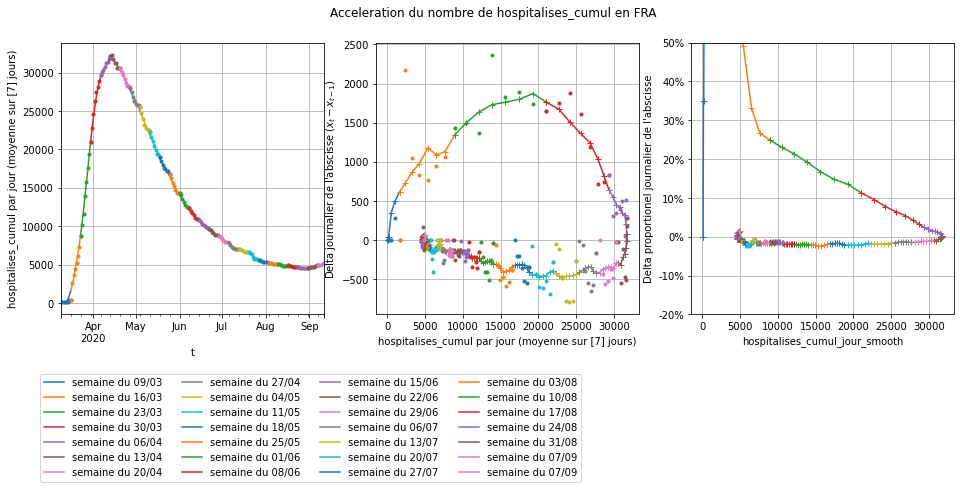

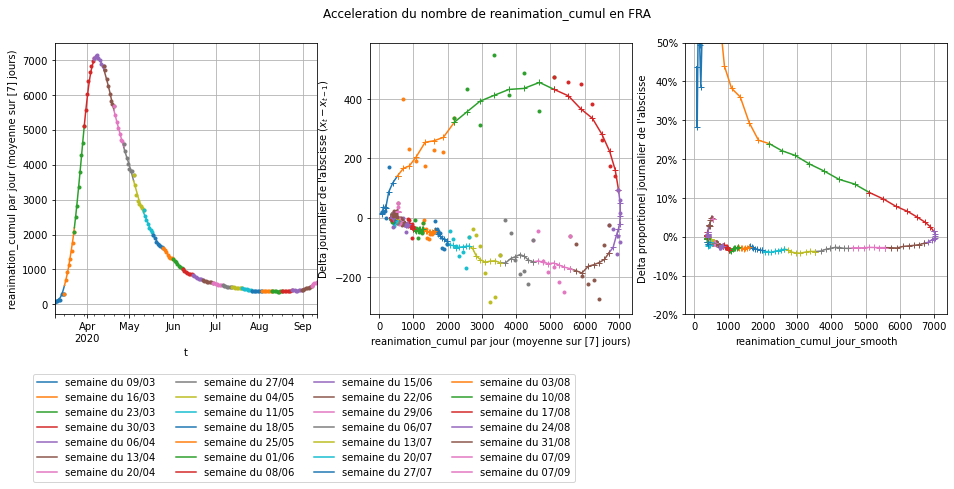

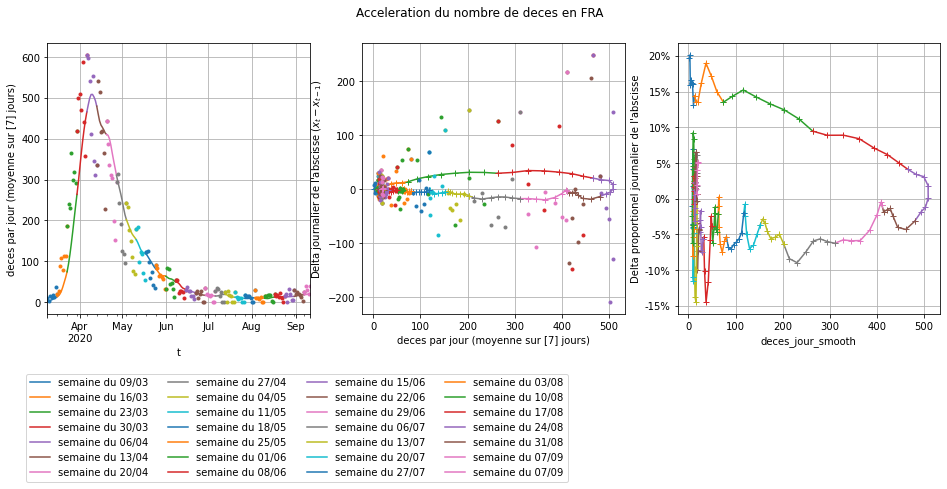

In [12]:
plots_maille_code(maille_active='FRA')

### Dynamique en Ile de France

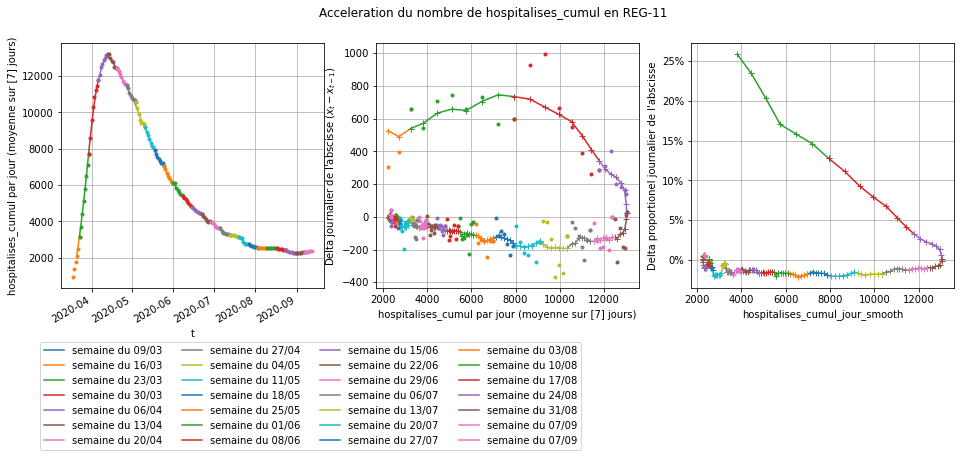

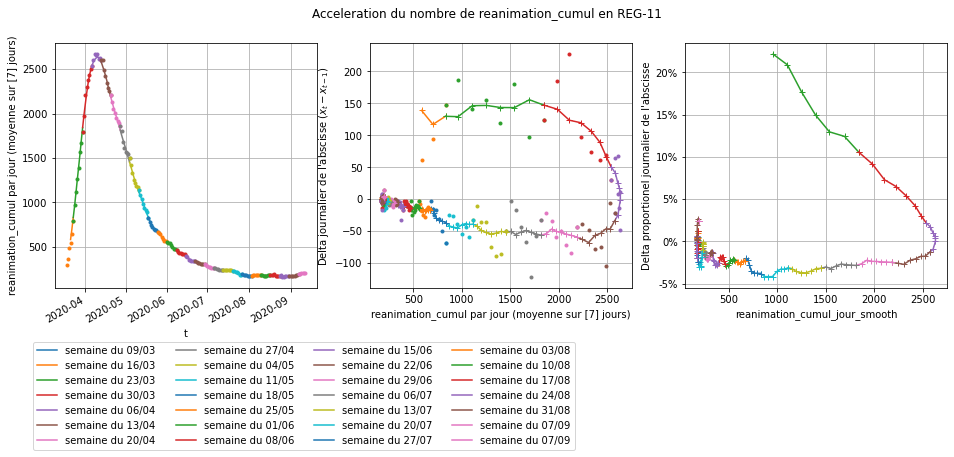

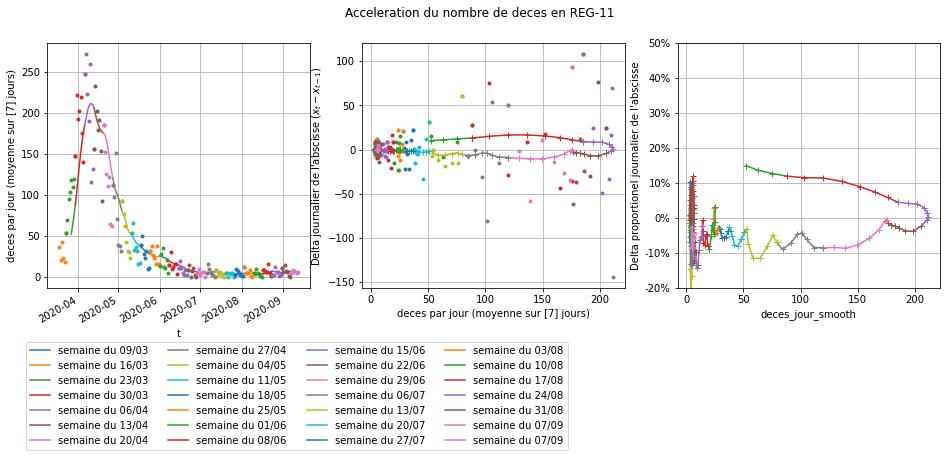

In [13]:
plots_maille_code(maille_active='REG-11')

## Graphes par regions

Pour chaque région les nombres de réanimation et de décès ainsi que leur dynamique est
présenté ci-dessous.

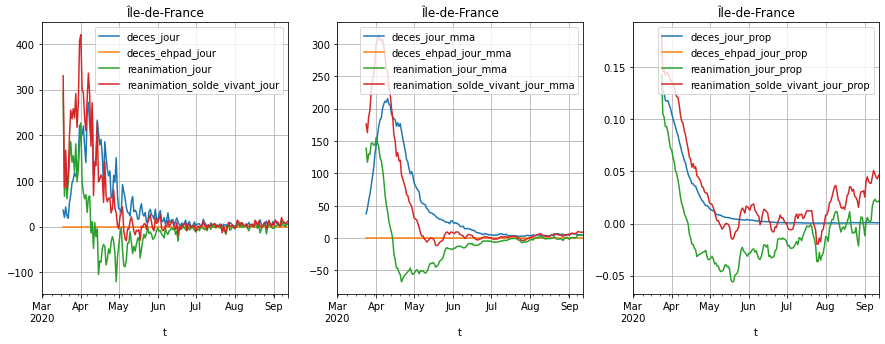

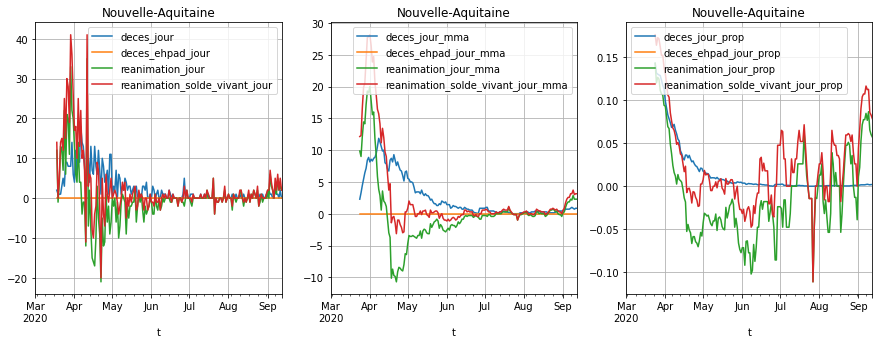

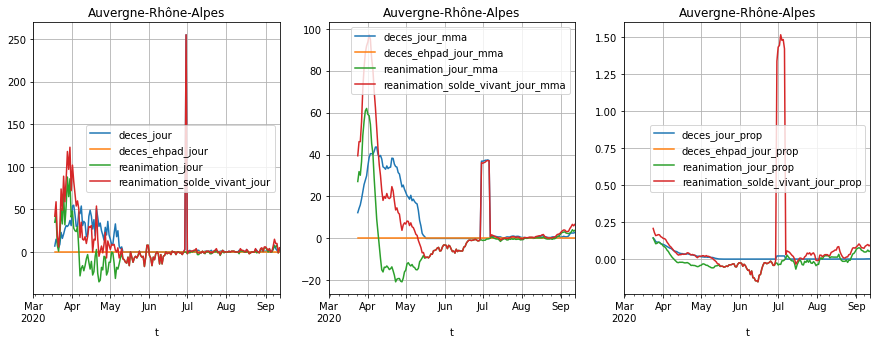

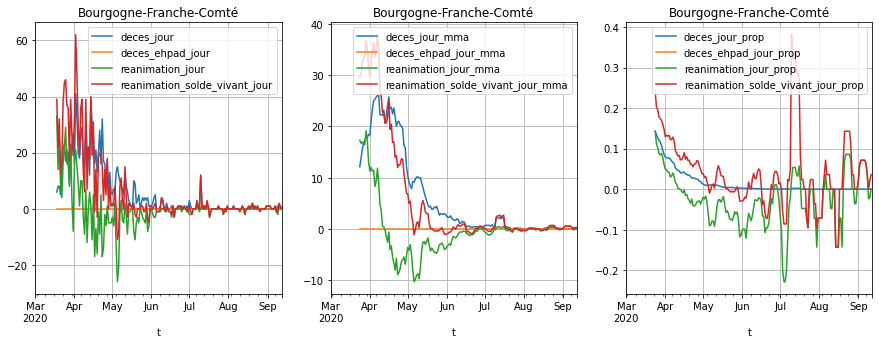

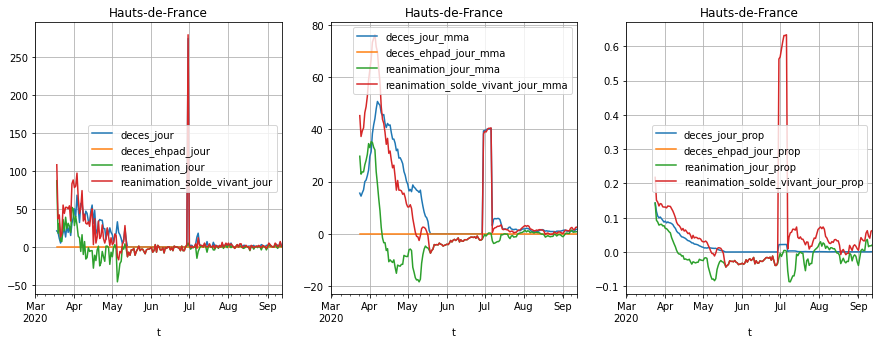

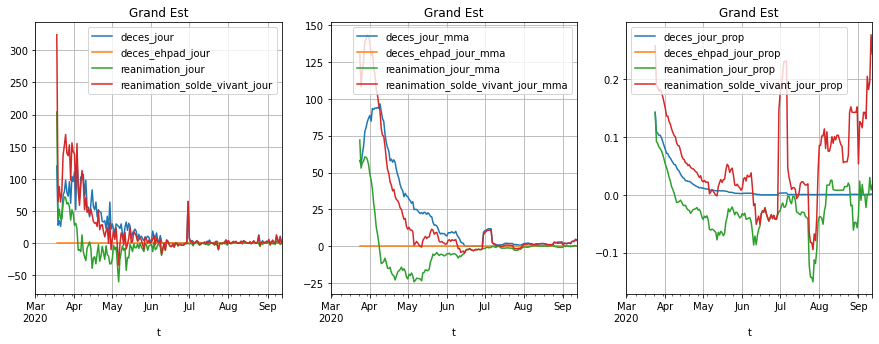

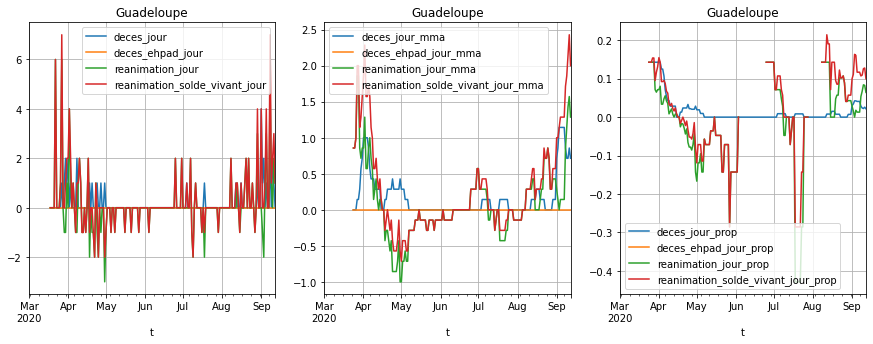

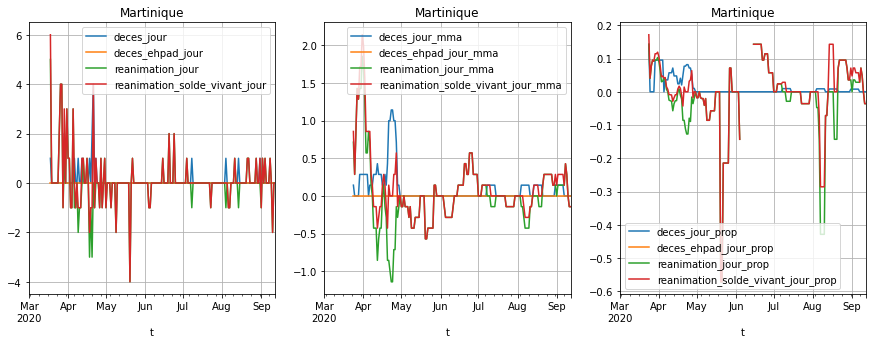

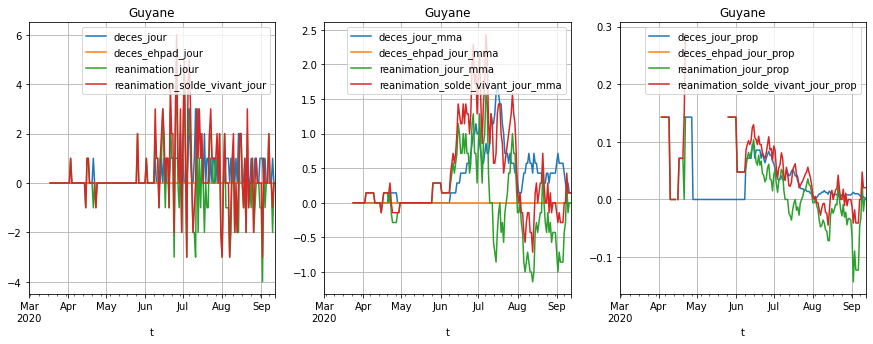

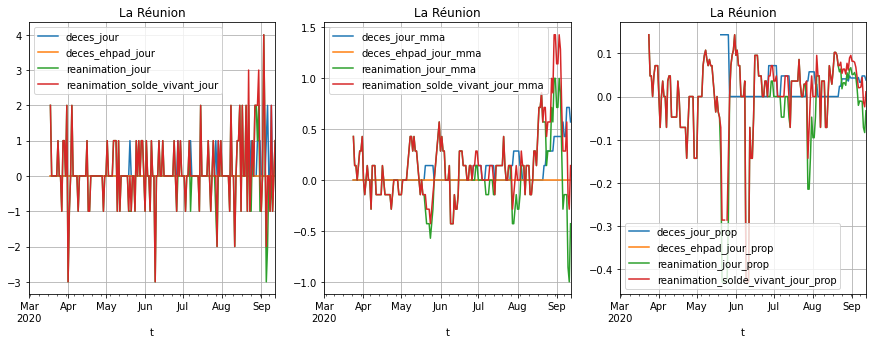

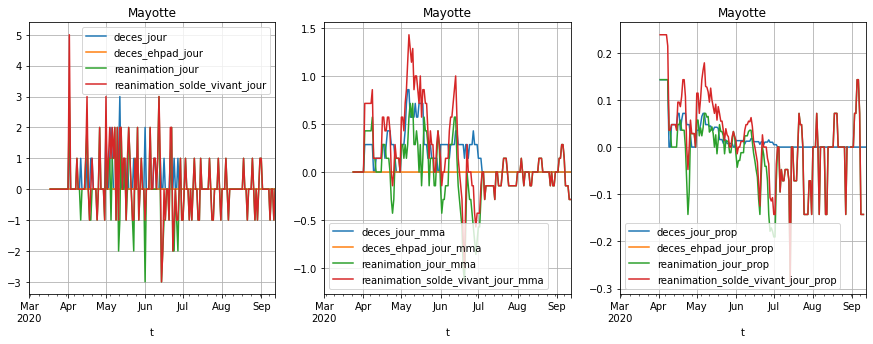

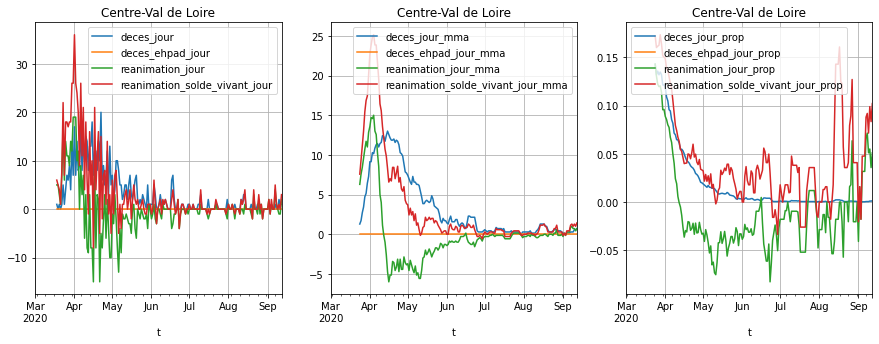

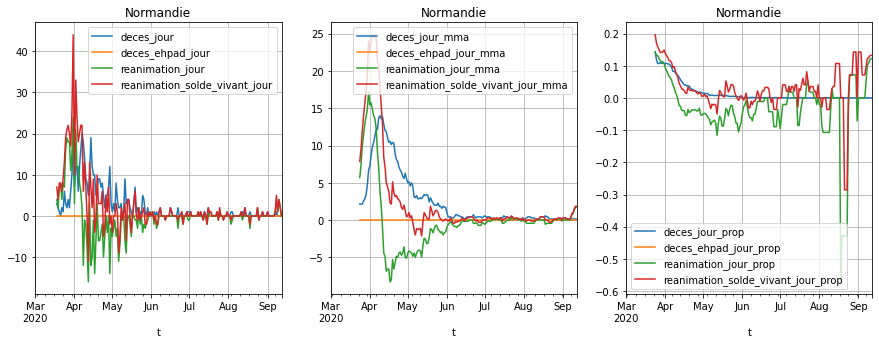

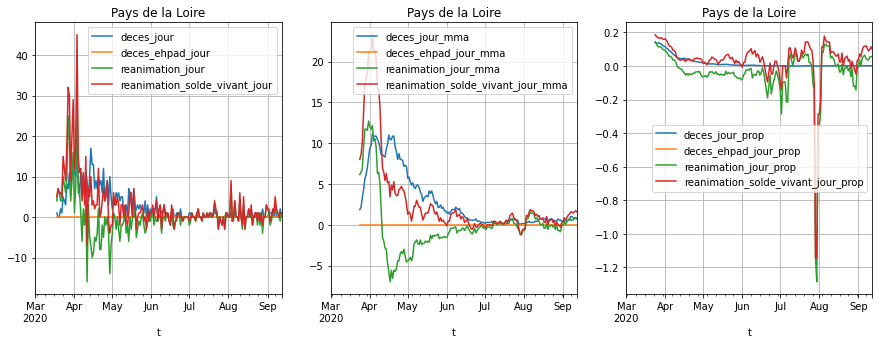

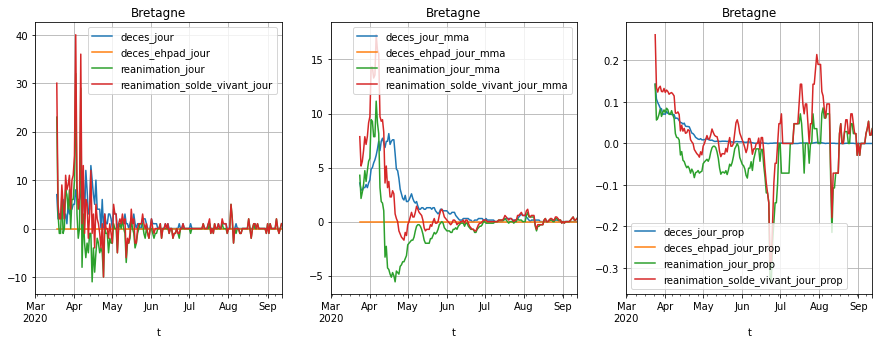

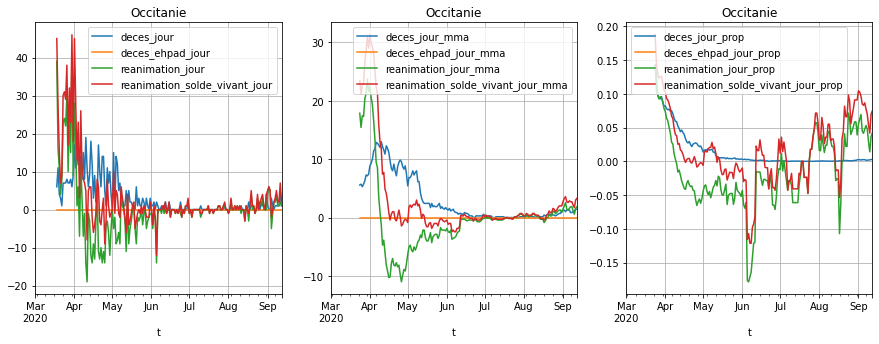

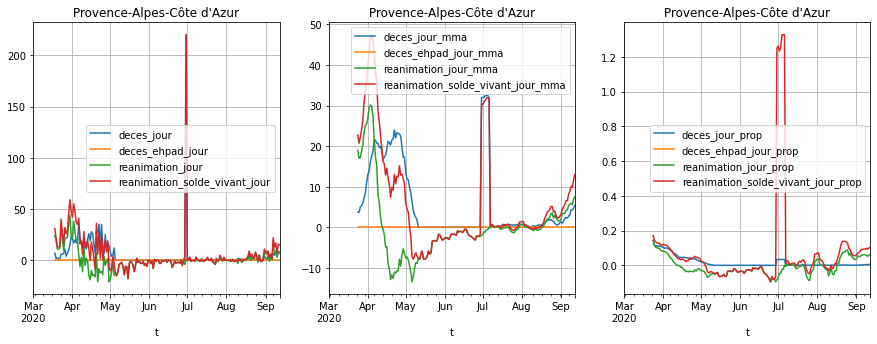

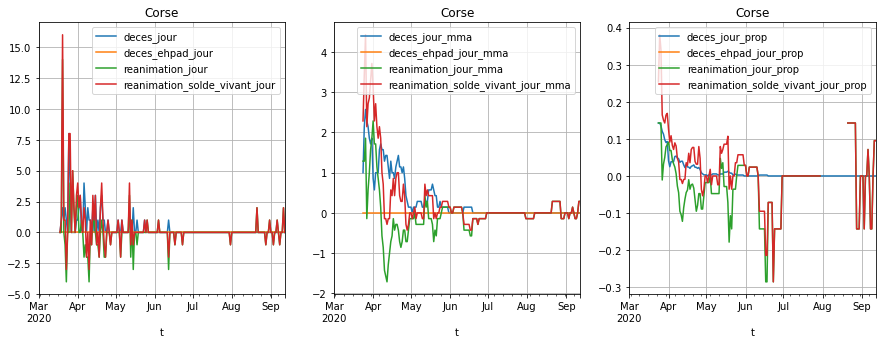

In [14]:
list_reg = [r for r in data["maille_code"].unique() if "REG" in r]
for reg in list_reg:
    oc19_data_preproc(data, reg)